In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [12]:
df = df_ = pd.read_csv(filepath_or_buffer="C:\\Lib\\fifa_players.csv")
df = df_.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
df = df.drop(columns=['full_name','name','birth_date','nationality'])

categorical_to_nums = {'preferred_foot'  :   {'Left'  : 0, 'Right' : 1,},
                       'body_type'  :   {'Lean'  : 0, 'Normal' : 1, 'Stocky' : 2}} 
for column, mapping in categorical_to_nums.items():
    temp_series = df[column].copy()
    null_mask = temp_series.isnull()
    temp_series.loc[~null_mask] = temp_series.loc[~null_mask].map(mapping) 
    df[column] = temp_series.fillna(-1).astype('int64')

df['positions'] = df['positions'].str.split(',').str[0]   


for column in ['height_cm','value_euro','wage_euro','release_clause_euro' ]:   
    df[column] = df.groupby('positions')[column].transform(lambda x: x.fillna(x.median()))
    
    
    
df = df.drop(columns=['national_team','national_team_position','national_jersey_number','national_rating'])


encoder = LabelEncoder()

df['positions_encoded'] = encoder.fit_transform(df['positions'])


df = df.drop(columns=['positions'])

C:\Users\redoe\AppData\Local\Temp\ipykernel_20748\3583185044.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = temp_series.fillna(-1).astype('int64')
C:\Users\redoe\AppData\Local\Temp\ipykernel_20748\3583185044.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = temp_series.fillna(-1).astype('int64')


In [14]:
X = df.drop(columns=['value_euro'])


y = df['value_euro']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.20)

In [15]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,y)
mutual_info = pd.Series(mutual_info, index=X.columns)

In [16]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001D588B7A520>)

In [17]:
X_train = pd.DataFrame(selected_top_columns.transform(X_train), 
                     columns=X_train.columns[selected_top_columns.get_support()], 
                     index=X_train.index)

X_test = pd.DataFrame(selected_top_columns.transform(X_test), 
                    columns=X_test.columns[selected_top_columns.get_support()], 
                    index=X_test.index)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
def shorten_number(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.2f}B'  # Milyar
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.2f}M'  # Milyon
    elif x >= 1_000:
        return f'{x / 1_000:.2f}K'  # Bin
    else:
        return str(x)

In [20]:
forest_regressor = RandomForestRegressor(n_estimators=100,random_state=42)
forest_regressor.fit(X_train, y_train)
forest_pred = forest_regressor.predict(X_test)
    
forest_pred_abs = abs(forest_pred)
forest_score_train = forest_regressor.score(X_train, y_train)
forest_score_test = forest_regressor.score(X_test, y_test)

print(forest_score_test)
print(forest_score_train)

mse = mean_squared_error(y_test, forest_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, forest_pred)
cross_val = cross_val_score(forest_regressor, X_train, y_train, cv=10)
r2 = r2_score(y_test, forest_pred)
forest_values = {'Mean Squared Error'       :   mse,
                     'Root Mean Squared Error'  :   rmse,
                     'Mean Absolute Error'      :   mae,
                     'Cross Validation'         :   cross_val,
                     'R2 Score'                 :   r2}


print(forest_values)


0.9883655328594727
0.9982904514954104
{'Mean Squared Error': 376499597604.42773, 'Root Mean Squared Error': 613595.6303661457, 'Mean Absolute Error': 184200.96073517125, 'Cross Validation': array([0.98971609, 0.99192332, 0.98565425, 0.98524806, 0.99227689,
       0.9856245 , 0.988514  , 0.98593155, 0.99004434, 0.96498353]), 'R2 Score': 0.9883655328594727}


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

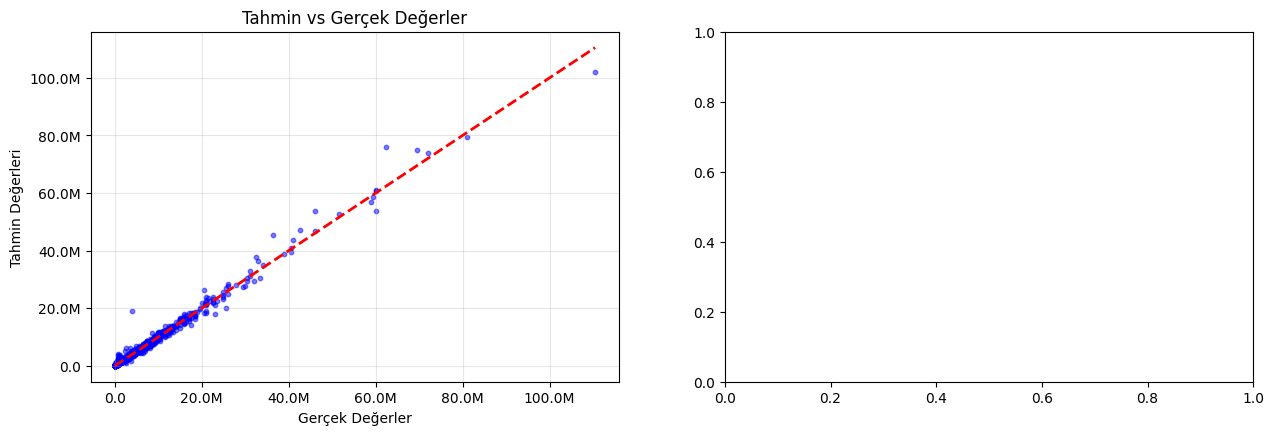

In [21]:

forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)
forest_pred = forest_regressor.predict(X_test)
forest_pred_abs = abs(forest_pred)

# Model skorları
forest_score_train = forest_regressor.score(X_train, y_train)
forest_score_test = forest_regressor.score(X_test, y_test)

# Performans metrikleri
mse = mean_squared_error(y_test, forest_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, forest_pred)
cross_val = cross_val_score(forest_regressor, X_train, y_train, cv=10)
r2 = r2_score(y_test, forest_pred)

forest_values = {
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'Cross Validation': cross_val,
    'R2 Score': r2
}

# Sayıları kısaltmak için yardımcı fonksiyon
def shorten_number(x, p):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.1f}'

# Görselleştirmeler
plt.figure(figsize=(15, 10))

# 1. Tahmin vs Gerçek Değerler Grafiği
plt.subplot(2, 2, 1)
plt.scatter(y_test, forest_pred_abs, color='blue', alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(shorten_number))
plt.title("Tahmin vs Gerçek Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerleri")
plt.grid(True, alpha=0.3)

# 2. Özellik Önem Dereceleri
plt.subplot(2, 2, 2)
feature_importance = pd.Series(forest_regressor.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title("En Önemli 10 Özellik")
plt.xlabel("Önem Derecesi")

# 3. Residual (Artık) Grafiği
plt.subplot(2, 2, 3)
residuals = y_test - forest_pred
plt.scatter(forest_pred, residuals, color='blue', alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Artık Değerler Grafiği")
plt.xlabel("Tahmin Değerleri")
plt.ylabel("Artık Değerler")
plt.grid(True, alpha=0.3)

# 4. Cross Validation Sonuçları
plt.subplot(2, 2, 4)
plt.boxplot(cross_val)
plt.title("Cross Validation Sonuçları")
plt.ylabel("Skor")

plt.tight_layout()
plt.show()

# Performans metriklerini yazdırma
print("\nModel Performans Metrikleri:")
print("-" * 30)
print(f"Train Score: {forest_score_train:.4f}")
print(f"Test Score: {forest_score_test:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.4f}")
print(f"Cross Validation Ortalama Skor: {np.mean(cross_val):.4f}")